In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import os
import json

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# get call environmental variable PUIDATA
PUIDATA = os.getenv('PUIDATA')
PUIDATA

'/home/cusp/ep2247/PUIdata'

In [3]:
# read in the datasets using the env. variable

nrg = pd.read_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = pd.read_csv(os.getenv("PUIDATA") + "/Manhattan/MN.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
#bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")

In [5]:
bsize = pd.DataFrame(bsize)
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [6]:
nrg.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [7]:
nrg = nrg[['BBL', 'Postcode', 'DOF Property Floor Area (Buildngs and Parking)(ft2)',
          'Borough', 'DOF Number of Buildings','Site EUI(kBtu/ft2)']]
nrg.head()

,BBL,Postcode,DOF Property Floor Area (Buildngs and Parking)(ft2),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2)
0,1.000410e+09,NaN,NaN,Manhattan,NaN,NaN
1,4.021460e+09,11375.0,82730.0,Queens,1.0,NaN
2,2.027620e+09,NaN,NaN,Bronx,NaN,NaN
3,1.006700e+09,10001.0,440360.0,Manhattan,1.0,NaN
4,2.048300e+09,NaN,NaN,Bronx,NaN,NaN


In [8]:
nrg.columns = ['BBL','Zipcode','DOF Property Floor Area (Buildngs and Parking)(ft2)','Borough',
           'DOF Number of Buildings','Site EUI(kBtu/ft2)']
nrg.head()

,BBL,Zipcode,DOF Property Floor Area (Buildngs and Parking)(ft2),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2)
0,1.000410e+09,NaN,NaN,Manhattan,NaN,NaN
1,4.021460e+09,11375.0,82730.0,Queens,1.0,NaN
2,2.027620e+09,NaN,NaN,Bronx,NaN,NaN
3,1.006700e+09,10001.0,440360.0,Manhattan,1.0,NaN
4,2.048300e+09,NaN,NaN,Bronx,NaN,NaN


In [9]:
nrg = nrg[nrg['Borough'] == 'Manhattan']
nrg.head()

,BBL,Zipcode,DOF Property Floor Area (Buildngs and Parking)(ft2),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2)
0,1.000410e+09,NaN,NaN,Manhattan,NaN,NaN
3,1.006700e+09,10001.0,440360.0,Manhattan,1.0,NaN
15,1.004370e+09,10009.0,52390.0,Manhattan,1.0,NaN
16,1.013110e+09,10022.0,313200.0,Manhattan,1.0,125.4
18,1.006460e+09,NaN,NaN,Manhattan,NaN,NaN


In [10]:
bsize.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [11]:
bsize = bsize[['BBL','ZipCode', 'UnitsRes', 'UnitsTotal', 'YearBuilt']]
bsize.head()

,BBL,ZipCode,UnitsRes,UnitsTotal,YearBuilt
0,1.000010e+09,10004.0,0,0,1900
1,1.000010e+09,10004.0,0,0,1900
2,1.000010e+09,10004.0,0,0,1900
3,1.000010e+09,10004.0,0,0,0
4,1.000010e+09,10004.0,0,0,0


# Exploratory Analysis

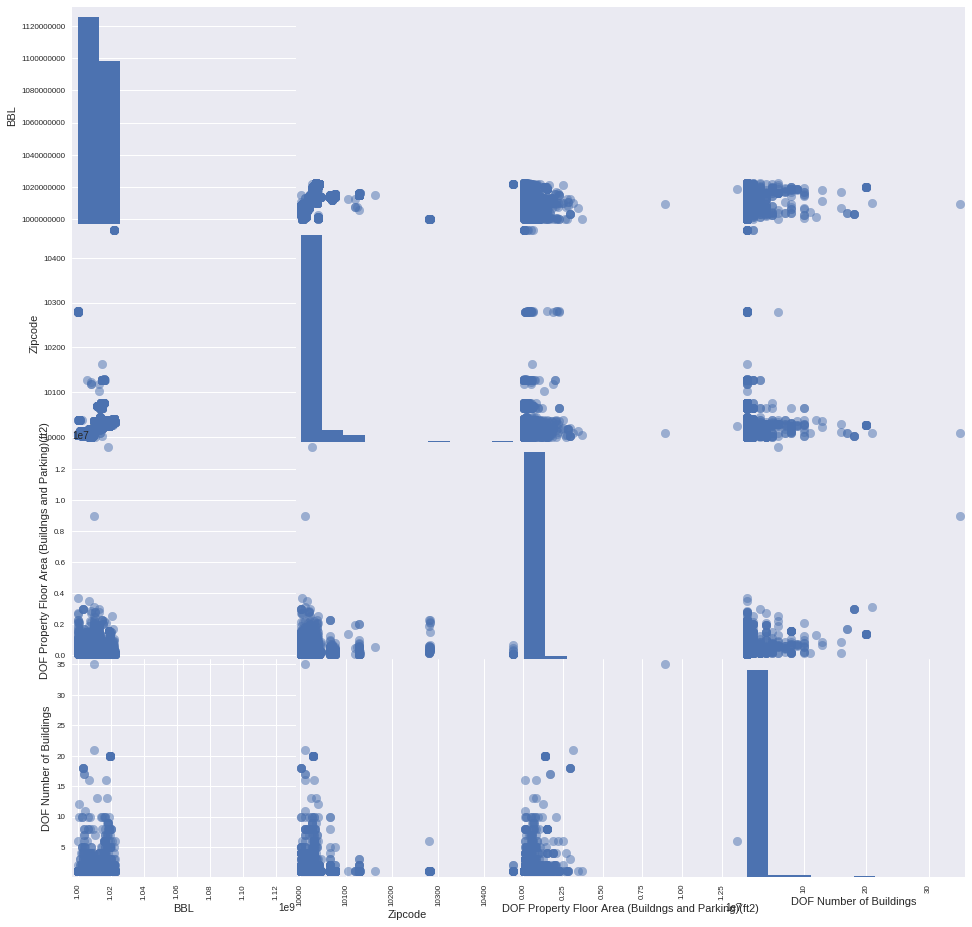

In [12]:
#try make a scatter plot of nrg. Few columns will plot - only those that have numerical values. 
#Pandas will ignore the other ones

from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16));

## Figure 1:

### In the scatter matrix, you see that the plots are identical for each variable just rotated (eg. BBL vs. DOF Number of Buildings).  When plotting variables against themselves, they make a plot similer to a bar graph or possibly a histrogram.  The scatter matrix also did not plot the Site EUI(kBtu/ft2) column, or the Borough Column from the nrg dataframe.    The is probably due to the fact that those two columns are objects instead of floats.

In [13]:
nrg.dtypes

BBL                                                    float64
Zipcode                                                float64
DOF Property Floor Area (Buildngs and Parking)(ft2)    float64
Borough                                                 object
DOF Number of Buildings                                float64
Site EUI(kBtu/ft2)                                      object
dtype: object

In [14]:
# convert objects to floats

def tonumeric(x):
    x = pd.to_numeric(x, errors = 'coerce')
    return x
    

In [15]:
nrg['Site EUI(kBtu/ft2)'] = nrg['Site EUI(kBtu/ft2)'].apply(tonumeric)

In [16]:
nrg.dtypes

BBL                                                    float64
Zipcode                                                float64
DOF Property Floor Area (Buildngs and Parking)(ft2)    float64
Borough                                                 object
DOF Number of Buildings                                float64
Site EUI(kBtu/ft2)                                     float64
dtype: object

In [17]:
bsize.dtypes

BBL           float64
ZipCode       float64
UnitsRes        int64
UnitsTotal      int64
YearBuilt       int64
dtype: object

In [18]:
#How many missing values?
indx = np.isnan(nrg['Site EUI(kBtu/ft2)']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))
#do it for however many columns you need

invalid entries changed to NaN 1544


In [19]:
pd.merge?

In [20]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010010.0, 1000410001.0)

In [21]:
#merge the datasets together on the column BBL

bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()
bblnrgdata.shape

(4711, 10)

In [22]:
bblnrgdata.head()

,BBL,Zipcode,DOF Property Floor Area (Buildngs and Parking)(ft2),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2),ZipCode,UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,10022.0,313200.0,Manhattan,1.0,125.4,10022.0,0,56,1977
15,1.007660e+09,10011.0,53168.0,Manhattan,1.0,122.3,10011.0,0,8,1912
16,1.008150e+09,10018.0,364000.0,Manhattan,1.0,117.0,10018.0,0,24,1954
18,1.005050e+09,10013.0,214110.0,Manhattan,1.0,82.1,10013.0,0,24,1926
19,1.021420e+09,10032.0,64816.0,Manhattan,1.0,137.7,10032.0,54,62,1924


In [23]:
bblnrgdata = bblnrgdata[['BBL','DOF Property Floor Area (Buildngs and Parking)(ft2)', 
                         'DOF Number of Buildings','Site EUI(kBtu/ft2)','UnitsRes','UnitsTotal',
                        'YearBuilt']]
bblnrgdata.head()

,BBL,DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,313200.0,1.0,125.4,0,56,1977
15,1.007660e+09,53168.0,1.0,122.3,0,8,1912
16,1.008150e+09,364000.0,1.0,117.0,0,24,1954
18,1.005050e+09,214110.0,1.0,82.1,0,24,1926
19,1.021420e+09,64816.0,1.0,137.7,54,62,1924


In [24]:
bblnrgdata2 = bblnrgdata[['BBL','Site EUI(kBtu/ft2)','UnitsRes','UnitsTotal','YearBuilt']]
bblnrgdata2.head()

,BBL,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,125.4,0,56,1977
15,1.007660e+09,122.3,0,8,1912
16,1.008150e+09,117.0,0,24,1954
18,1.005050e+09,82.1,0,24,1926
19,1.021420e+09,137.7,54,62,1924


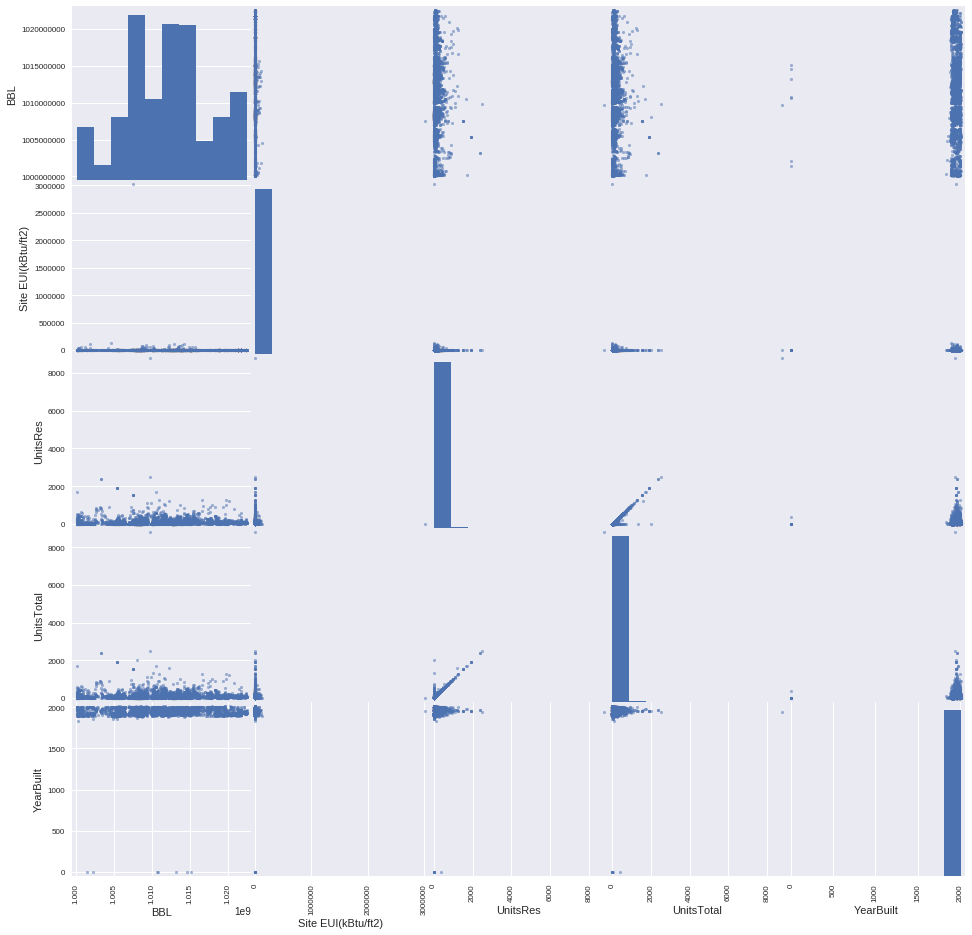

In [25]:
#Scatter matric of the merged data

scatter_matrix (bblnrgdata2, s=30, figsize=(16, 16));

## Figure 2:  Scatter Matrics of the Merged Data

#### The matrix shows us the relationships between all the variables in the merged dataframe.  Compared to the nrg scatter matrix, BBL against BBL has more of a histogram shape to it, while the other variables against themselves still have more of a bar plot shape.  It also looks like there is a linear relationship between UnitsRes and UnitsTotal.

In [26]:
bblnrgdata2['Total Energy Consumption (kBtu)'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['DOF Property Floor Area (Buildngs and Parking)(ft2)']

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
bblnrgdata2.head()

,BBL,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt,Total Energy Consumption (kBtu)
2,1.013110e+09,125.4,0,56,1977,39275280.0
15,1.007660e+09,122.3,0,8,1912,6502446.4
16,1.008150e+09,117.0,0,24,1954,42588000.0
18,1.005050e+09,82.1,0,24,1926,17578431.0
19,1.021420e+09,137.7,54,62,1924,8925163.2


Text(0.5,1,'Total Energy Consumption and Number of Units')

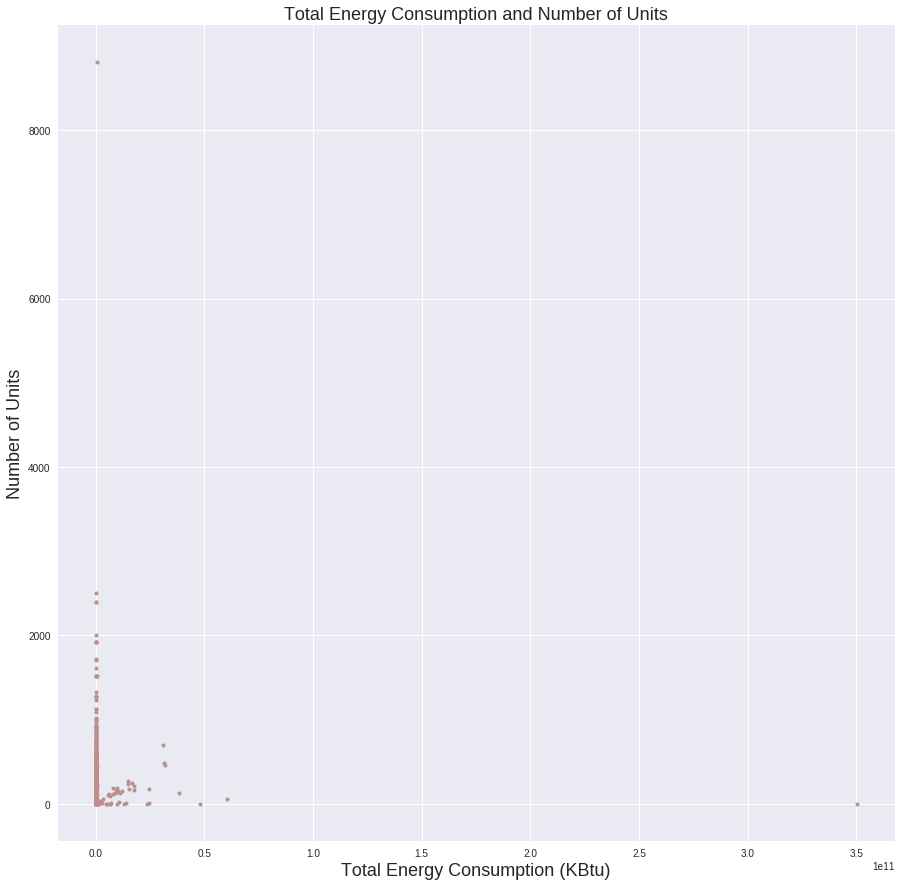

In [28]:
fig = figsize(15,15)
ax = subplot(111)
pl.plot(bblnrgdata2['Total Energy Consumption (kBtu)'],bblnrgdata2['UnitsTotal'],
        'o',color='rosybrown', markersize = 4)
ax.set_xlabel("Total Energy Consumption (KBtu)",fontsize='18')
ax.set_ylabel("Number of Units",fontsize='18')
ax.set_title("Total Energy Consumption and Number of Units",fontsize='18')

## Figure 3: Scatter plot showing the total energy consumption(kBtu) vs. number of units.

#### You can see a few outliers in the scatter plot, the numbers are too big to be able to make an assumption about the data.  In this scatter plot, it looks like the total energy consumption is not to high when you dont take the outliers into account.

Text(0.5,1,'Total Energy Consumption and Number of Units')

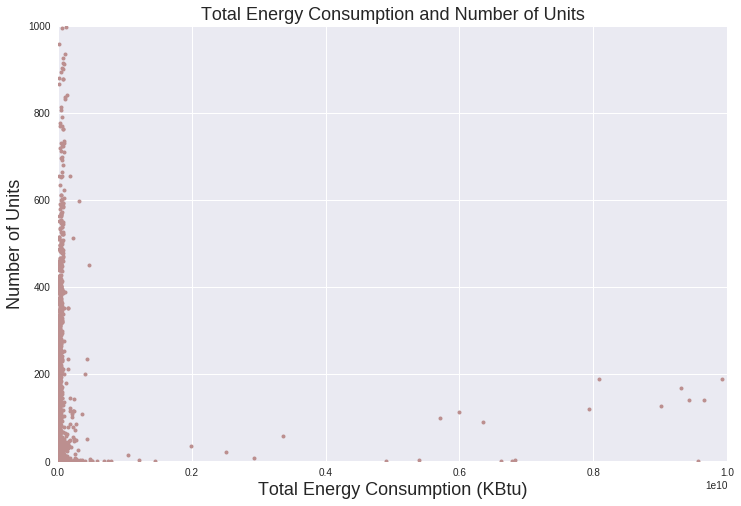

In [29]:
fig = figsize(12,8)
ax = subplot(111)
pl.plot(bblnrgdata2['Total Energy Consumption (kBtu)'],bblnrgdata2['UnitsTotal'],
        'o',color='rosybrown', markersize = 4)
ax.set_xlim(1000,1e10)
ax.set_ylim(1,1000)
ax.set_xlabel("Total Energy Consumption (KBtu)",fontsize='18')
ax.set_ylabel("Number of Units",fontsize='18')
ax.set_title("Total Energy Consumption and Number of Units",fontsize='18')

## Figure 4: Scatter plot showing the total energy consumption(kBtu) vs. number of units.  Zoomed in to area where most of the points are located.

#### Here this plot is zoomed in so you do not see the outliers as much.  In the plot, most of the data is toawrd the yaxis 0 line.

Text(0.5,1,'Total Energy Consumption and Number of Units in Building')

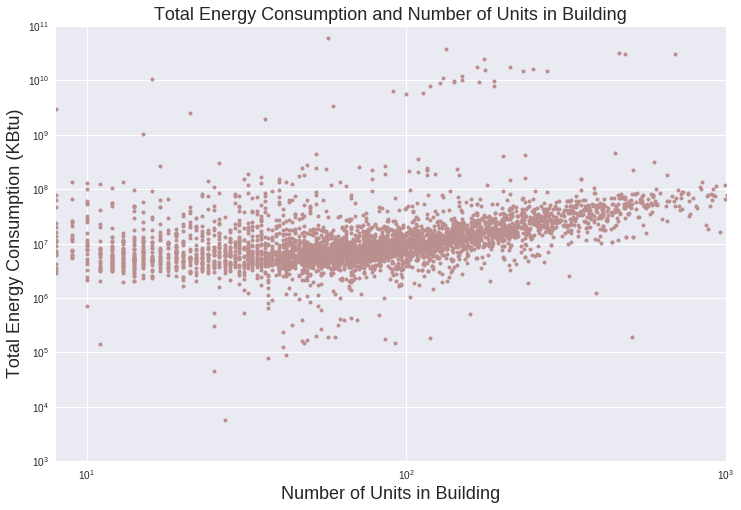

In [30]:
fig = figsize(12,8)
ax = subplot(111)
pl.loglog(bblnrgdata2['UnitsTotal'],bblnrgdata2['Total Energy Consumption (kBtu)'],
          'o',color='rosybrown', markersize = 4)
ax.set_ylim(1000,1e11)
ax.set_xlim(8,1000)
ax.set_ylabel("Total Energy Consumption (KBtu)",fontsize='18')
ax.set_xlabel("Number of Units in Building",fontsize='18')
ax.set_title("Total Energy Consumption and Number of Units in Building",fontsize='18')

## Figure 5: Log scatter plot showing the number of units vs. total energy consumption(kBtu).

#### Looking that this plot, you have a better understanding of the possible location of where you could fit a line of curve through the data.

In [31]:

bblnrgdataCut = bblnrgdata2[(bblnrgdata2['Total Energy Consumption (kBtu)'] > 1000) *
                            (bblnrgdata2.UnitsTotal>=10) * (bblnrgdata2.UnitsTotal<1000)]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [32]:
bblnrgdataCut.head()

,BBL,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt,Total Energy Consumption (kBtu)
2,1.013110e+09,125.4,0,56,1977,39275280.0
16,1.008150e+09,117.0,0,24,1954,42588000.0
18,1.005050e+09,82.1,0,24,1926,17578431.0
19,1.021420e+09,137.7,54,62,1924,8925163.2
20,1.021750e+09,103.2,75,85,1920,6485810.4


Text(0.5,1,'Total Energy Consumption and Number of Units in Building')

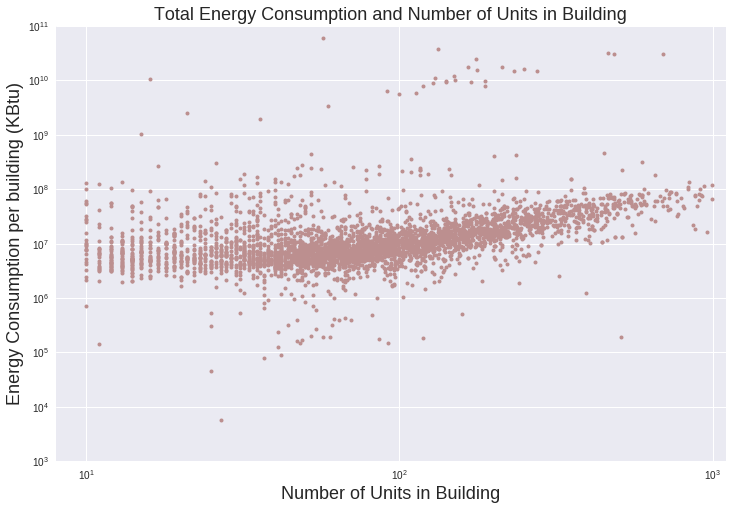

In [33]:
fig = figsize(12,8)
ax = subplot(111)
pl.loglog(bblnrgdataCut['UnitsTotal'],bblnrgdataCut['Total Energy Consumption (kBtu)'],
          'o',color='rosybrown', markersize = '4')
ax.set_ylim(1000,1e11)
ax.set_xlim(8,1.1e3)
ax.set_ylabel("Energy Consumption per building (KBtu)",fontsize='18')
ax.set_xlabel("Number of Units in Building",fontsize='18')
ax.set_title("Total Energy Consumption and Number of Units in Building",fontsize='18')

## Figure 6: Log scatter plot showing the number of unit in Building vs. energy consumption per building (kBtu).

#### Looking that this plot, you have a better understanding of the possible location of where you could fit a line of curve through the data.

In [34]:
# OLS regression to make a line to fit to scatter plot
X = sm.add_constant(np.log10(bblnrgdataCut.UnitsTotal))
linmodel = sm.OLS(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']), X, missing='drop').fit()

Text(0.5,1,'Total Energy Consumption and Number of Units in Building')

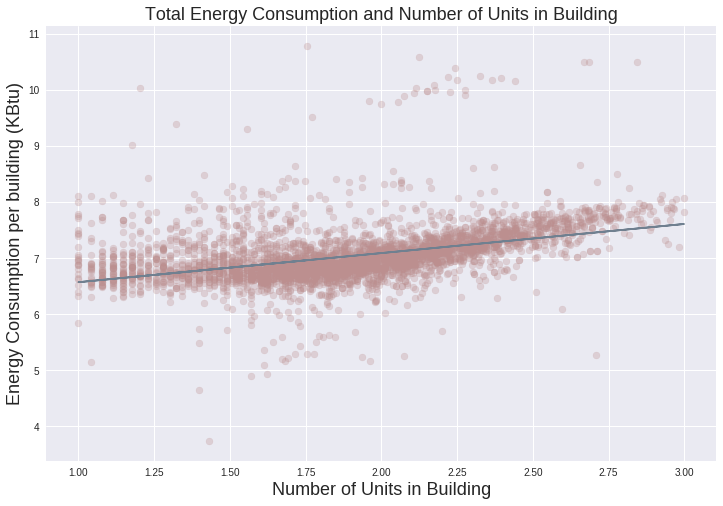

In [35]:
fig = figsize(12,8)
ax = subplot(111)

#pl.loglog(bblnrgdataCut['UnitsTotal'],bblnrgdataCut['Total Energy Consumption (kBtu)'],
          #'o',color='rosybrown', markersize = '4')

plt.scatter(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']),
           color = 'rosybrown', alpha = 0.3)
#plot the fitted line
plt.plot(np.log10(bblnrgdataCut.UnitsTotal), linmodel.predict(X), c='slategray')
plt.ylabel("Energy Consumption per building (KBtu)",fontsize='18')
plt.xlabel("Number of Units in Building",fontsize='18')
plt.title("Total Energy Consumption and Number of Units in Building",fontsize='18')

#ax.set_ylim(1000,1e11)
#ax.set_xlim(8,1.1e3)

## Figure 7: Log scatter plot with fitted line showing the number of unit in Building vs. energy consumption per building (kBtu).  


#### In this plot, you can see where the fitted line is.  You can see that many of the data points are concentrated along the line, and most of them are concentrated below the line.  Seeing so many of the points concentrated below the line makes me wonder if a polynomial fit might be better (y = x^2 + x)

In [36]:
X2 = sm.add_constant(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']))
linmodel2 = sm.OLS(np.log10(bblnrgdataCut.UnitsTotal), X2, missing='drop').fit()

Text(0.5,1,'Total Energy Consumption and Number of Units in Building')

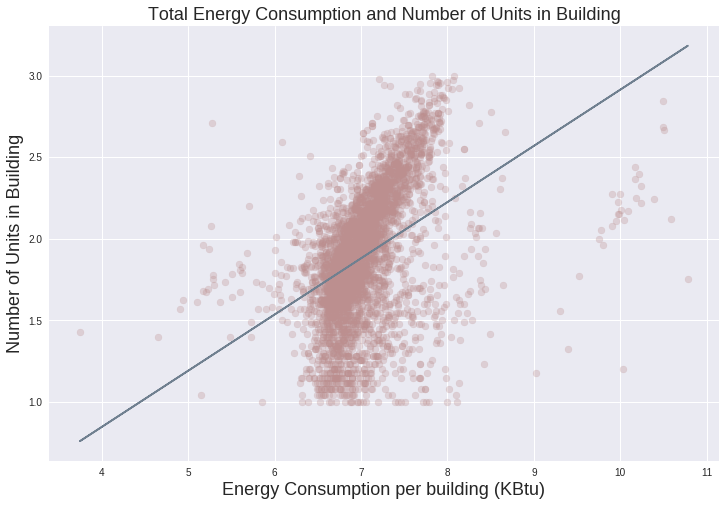

In [37]:
fig = figsize(12,8)
ax = subplot()

plt.scatter(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']), np.log10(bblnrgdataCut.UnitsTotal),
           color='rosybrown', alpha = 0.3)

#pl.loglog(bblnrgdataCut['Total Energy Consumption (kBtu)'],bblnrgdataCut['UnitsTotal'],
          #'o',color='rosybrown', markersize = '4')

plt.plot(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']), linmodel2.predict(X2), c='slategray')

#plt.plot(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']), linmodel2.predict(X2), c='slategray')
plt.xlabel("Energy Consumption per building (KBtu)",fontsize='18')
plt.ylabel("Number of Units in Building",fontsize='18')
plt.title("Total Energy Consumption and Number of Units in Building",fontsize='18')

#ax.set_ylim(1000,1e11)
#ax.set_xlim(8,1.1e3)

## Figure 8: Log scatter plot with fitted line showing energy consumption per building (kBtu) vs. the number of unit in Building. 

#### Here you can see the log plot with the data on opposite axis, you can see that the data looks better in the other plot because the line does not fit this log graph at all.

## Evaluate using chi - square test
### these models are not nested.

In [38]:
# function to calculate chi-square

def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

### Chi square for units vs. energy

In [39]:
data = np.log10(bblnrgdataCut.UnitsTotal)
model = linmodel.predict(sm.add_constant(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)'])))

In [40]:
#data = bblnrgdataCut.UnitsTotal
#model = bblnrgdataCut['Total Energy Consumption (kBtu)']

In [41]:
chi2(data, model, errors = None)

245504.15199608091

### Chi square for energy vs. units

In [42]:
data2 = np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)'])
model2 = linmodel.predict(sm.add_constant(np.log10(bblnrgdataCut.UnitsTotal)))

In [43]:
chi2(data2, model2, errors = None)

776.32925589797492

## Assume Poisson Statistics

In [44]:
errorsnrg = np.sqrt((bblnrgdataCut['Total Energy Consumption (kBtu)'])**2 +\
                (bblnrgdataCut['Site EUI(kBtu/ft2)']**2))

errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

In [45]:
errorsnrg.head()

2     3.927528e+07
16    4.258800e+07
18    1.757843e+07
19    8.925163e+06
20    6.485810e+06
dtype: float64

In [46]:
errorsunits.head()

2     7.483315
16    4.898979
18    4.898979
19    7.874008
20    9.219544
Name: UnitsTotal, dtype: float64

In [47]:
#errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.nrg / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))
errorsInLogNrg = np.abs(errorsnrg / (bblnrgdata2['Total Energy Consumption (kBtu)']) / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

bblnrgdataCut.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,BBL,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt,Total Energy Consumption (kBtu),errorsnrg,errorsunits
2,1.013110e+09,125.4,0,56,1977,39275280.0,0.434294,0.058035
16,1.008150e+09,117.0,0,24,1954,42588000.0,0.434294,0.088650
18,1.005050e+09,82.1,0,24,1926,17578431.0,0.434294,0.088650
19,1.021420e+09,137.7,54,62,1924,8925163.2,0.434294,0.055155
20,1.021750e+09,103.2,75,85,1920,6485810.4,0.434294,0.047106


### Chi square for units vs. energy with errors

In [48]:
data = np.log10(bblnrgdataCut.UnitsTotal)
model = linmodel.predict(sm.add_constant(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)'])))

In [49]:
chi2(data, model, errorsInLogUnits)

145218773.36560279

### Chi square for energy vs. units with errors

In [50]:
data2 = np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)'])
model2 = linmodel.predict(sm.add_constant(np.log10(bblnrgdataCut.UnitsTotal)))

In [51]:
chi2(data2, model2, errorsInLogNrg)

ERROR:
must pass arrays of identical dimension for data, model and (optional) error)


-1

## Explanation for what just happened:

### The numbers that we got when calculating chi2 with and without errors is huge for calculating for units vs. energy.  You get a much smaller chi2 when calculating energy vs. units.  Getting the very large number could mean that the model is not good at predicting how much energy is consumed for the units?

## Fit a second degree polynomial to units vs. energy line

In [52]:
x = np.log10(bblnrgdataCut.UnitsTotal)
y = np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)'])

In [53]:
df = pd.DataFrame({'x': x, 'y':y})
df['x2'] = df.x**2
df.head()

,x,y,x2
2,1.748188,7.594119,3.056161
16,1.380211,7.629287,1.904983
18,1.380211,7.244980,1.904983
19,1.792392,6.950616,3.212668
20,1.929419,6.811964,3.722657


In [54]:
df1 = df.sort_values(by='x')
df1.head()

,x,y,x2
140,1.0,7.394771,1.0
1243,1.0,6.876020,1.0
764,1.0,7.060802,1.0
913,1.0,6.712018,1.0
2972,1.0,6.965475,1.0


In [55]:
X3 = sm.add_constant(np.log10(bblnrgdataCut.UnitsTotal))
polyline = smf.ols(formula = 'y ~ x2 + x', data = df).fit()
polyline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     632.9
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.29e-239
Time:                        20:21:36   Log-Likelihood:                -2242.7
No. Observations:                4012   AIC:                             4491.
Df Residuals:                    4009   BIC:                             4510.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.0623      0.117     69.197      0.000         7.834     8.291
x2             0.5767      0.032     17.961      0.000         0.514     0.640
x             -1.6813      0.124    -13.594      0.000        -1.924    -1.439
==============================================================================
Omnibus:                     2373.221   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60846.387
Skew:                           2.340   Prob(JB):                         0.00
Kurtosis:                      21.495   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Total Energy Consumption and Number of Units in Building')

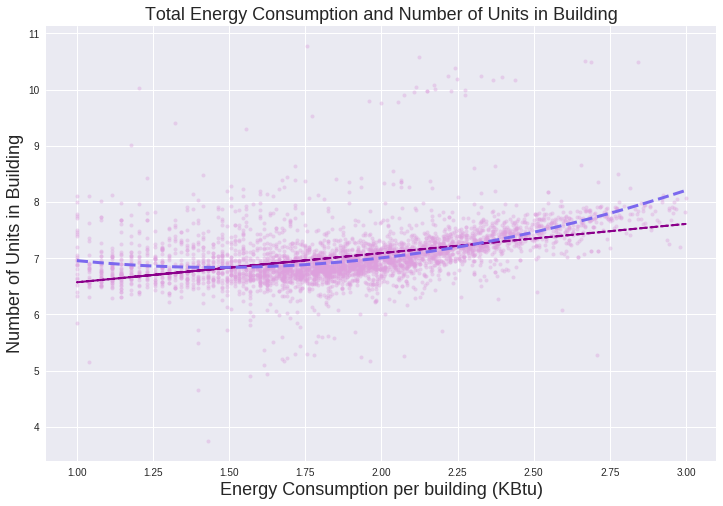

In [56]:
fig = pl.figure(figsize(12,8))

ax = fig.add_subplot(111)

#plot scatter plot of units vs. energy
ax.plot(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']),
       'o', color='plum', markersize = 4, alpha = 0.4)

# plot the fitted line
ax.plot(np.log10(bblnrgdataCut.UnitsTotal), linmodel.predict(X),'--', color = 'darkmagenta', lw =2)

# plot the polynomial line

ax.plot(df1.x, polyline.predict(df1), '--' , color = 'mediumslateblue', lw=3 )

#ax.set_title = ("Total Energy Consumption and Number of Units in Building")
#ax.set_xlabel = ("Number of Units in Building")
#ax.set_ylabel = ("Energy Consumption per building (kBtu)")

plt.xlabel("Energy Consumption per building (KBtu)",fontsize='18')
plt.ylabel("Number of Units in Building",fontsize='18')
plt.title("Total Energy Consumption and Number of Units in Building",fontsize='18')

## Figure 9: Log scatter plot with fitted line and fitted polynomial line showing energy consumption per building (kBtu) vs. the number of unit in Building. 

#### Here you can see the log plot showing the energy consumption per building vs the number of units in building.  This plot has both the fitted line and the fitted polynomial line.  In this plot, the fitted line has a better fit then just the line.  You can still see many points located under both the fitted line and fitted polynomial line.

## Likelihood ratio test

In [57]:
linemodel = linmodel
curvemodel = polyline

In [58]:
print ("LR : ", -2 * (-linemodel.llf - (curvemodel.llf)))
print("LR from statsmodels: ", curvemodel.compare_lr_test(linemodel)[0])

LR :  -9281.44859021
LR from statsmodels:  310.510388174


## Explanation:

### For chi square for DOF 1, we get a value of 310.510.  This tells us that there is no relationship between the energy consumption for each building vs the total units.